Loading CSV

In [ ]:
import pandas as pd
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Prachanda_English_final.csv')

In [ ]:
df

,video_id,author,published_at,like_count,text,time_period,script
0,6IwyQjpD11g,@swatantrasubba1888,2022-11-07 14:46:48,4.0,Election ko time ma publicity stunt☹️☹️☹️,before_election,English
1,lHgpI2jySGE,@tantrichill192,2022-11-12 18:22:35,0.0,Nothing but criminals and murderers these old ...,before_election,English
2,CUA-oaEFj7Y,@tulasirajkandel1614,2022-10-31 14:22:56,2.0,Nice song 👍,before_election,English
3,2-BSTr-gyic,@arjunroy4150,2022-05-27 09:29:43,1.0,I AM PROUD TO BE AN INDIAN. WE FEEL PROUD ...,before_election,English
4,lHgpI2jySGE,@kamalbhattarai9571,2022-11-09 10:20:29,1.0,Good conversation,before_election,English
...,...,...,...,...,...,...,...
1529,Def_LPo3SVw,@ytuser-n7p,2024-11-28 05:21:40,1.0,"editing level❤‍🔥🧨<a href=""UCkszU2WH9gy1mb0dV-1...",after_election,English
1530,AP966C5wwwc,@lokeshmadan2827,2024-07-30 14:58:46,0.0,Anyone form class 9,after_election,English
1531,Def_LPo3SVw,@surybhanmedicolife,2024-11-28 14:02:01,0.0,Physics - MR* or Aayudh sir,after_election,English
1532,Rv8J3aGDrfk,@theordinaryguyparvez3157,2024-09-23 05:55:51,0.0,Real Rockstar.. real singer.. real pop star.. ...,after_election,English


PREPROCESSING USING NLP

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (if not already downloaded)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

def preprocess_text(text):
    # 1. Lowercase the text
    text = text.lower()

    # 2. Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Tokenize the text
    tokens = text.split()

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Join the tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply the preprocessing function to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)


In [ ]:
df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
0,6IwyQjpD11g,@swatantrasubba1888,2022-11-07 14:46:48,4.0,Election ko time ma publicity stunt☹️☹️☹️,before_election,English,election ko time publicity stunt
1,lHgpI2jySGE,@tantrichill192,2022-11-12 18:22:35,0.0,Nothing but criminals and murderers these old ...,before_election,English,nothing criminal murderer old folk arethey jai...
2,CUA-oaEFj7Y,@tulasirajkandel1614,2022-10-31 14:22:56,2.0,Nice song 👍,before_election,English,nice song
3,2-BSTr-gyic,@arjunroy4150,2022-05-27 09:29:43,1.0,I AM PROUD TO BE AN INDIAN. WE FEEL PROUD ...,before_election,English,proud indian feel proud indian army
4,lHgpI2jySGE,@kamalbhattarai9571,2022-11-09 10:20:29,1.0,Good conversation,before_election,English,good conversation
...,...,...,...,...,...,...,...,...
1529,Def_LPo3SVw,@ytuser-n7p,2024-11-28 05:21:40,1.0,"editing level❤‍🔥🧨<a href=""UCkszU2WH9gy1mb0dV-1...",after_election,English,editing levela hrefuckszuwhgymbdvujgygfxpgummj...
1530,AP966C5wwwc,@lokeshmadan2827,2024-07-30 14:58:46,0.0,Anyone form class 9,after_election,English,anyone form class
1531,Def_LPo3SVw,@surybhanmedicolife,2024-11-28 14:02:01,0.0,Physics - MR* or Aayudh sir,after_election,English,physic mr aayudh sir
1532,Rv8J3aGDrfk,@theordinaryguyparvez3157,2024-09-23 05:55:51,0.0,Real Rockstar.. real singer.. real pop star.. ...,after_election,English,real rockstar real singer real pop star real s...


CREATE SEPARATE DATAFRAME FOR BEFORE AND AFTER ELECTION

In [ ]:
# Create two separate dataframes based on the 'time_period' column
before_election_df = df[df['time_period'] == 'before_election']
after_election_df = df[df['time_period'] == 'after_election']

In [ ]:
before_election_df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
0,6IwyQjpD11g,@swatantrasubba1888,2022-11-07 14:46:48,4.0,Election ko time ma publicity stunt☹️☹️☹️,before_election,English,election ko time publicity stunt
1,lHgpI2jySGE,@tantrichill192,2022-11-12 18:22:35,0.0,Nothing but criminals and murderers these old ...,before_election,English,nothing criminal murderer old folk arethey jai...
2,CUA-oaEFj7Y,@tulasirajkandel1614,2022-10-31 14:22:56,2.0,Nice song 👍,before_election,English,nice song
3,2-BSTr-gyic,@arjunroy4150,2022-05-27 09:29:43,1.0,I AM PROUD TO BE AN INDIAN. WE FEEL PROUD ...,before_election,English,proud indian feel proud indian army
4,lHgpI2jySGE,@kamalbhattarai9571,2022-11-09 10:20:29,1.0,Good conversation,before_election,English,good conversation
...,...,...,...,...,...,...,...,...
897,14Nprv6u07w,@phoenix8628,2022-02-18 17:17:06,0.0,biswa Geee 🙏🏾 thanks for good information ever...,before_election,English,biswa geee thanks good information everything
898,oF2qniNVJ50,@rajendra.co.uk12345,2022-10-15 02:52:18,0.0,Prachanda is the main reason being unstable go...,before_election,English,prachanda main reason unstable government nepa...
899,lHgpI2jySGE,@tekrajdulal855,2022-11-13 16:23:14,0.0,Great leader,before_election,English,great leader
900,eNu2jzttZ8E,@lekhnathacharya8462,2022-04-12 13:07:52,0.0,Prachanda boss dami all the best,before_election,English,prachanda bos dami best


In [ ]:
after_election_df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
902,Ms8N5-szpfU,@Monunahhar256,2024-09-02 17:35:35,0.0,Bich mm bhul gye thaa😂😂😂,after_election,English,bich mm bhul gye thaa
903,XgoxMLUjWR4,@NBGGAMING_OFFICIAL,2024-09-23 11:05:25,15.0,Motivation 10000000000000000000000%<br>Hard wo...,after_election,English,motivation brhard work
904,ukaQSc6VBJU,@parthparth1246,2024-11-14 08:07:02,2.0,Only political leader with guts to go after th...,after_election,English,political leader gut go corruptshats
905,1nPP0xxEEKU,@__Dallu456,2024-11-14 08:48:46,1.0,Bless everyone god 💸🌈💰,after_election,English,bless everyone god
906,6S6Y41QeQlQ,@MuhammadJameel-pp2wd,2024-09-29 01:30:36,4.0,Is song main motivation to hai💪💪😈😈,after_election,English,song main motivation hai
...,...,...,...,...,...,...,...,...
1529,Def_LPo3SVw,@ytuser-n7p,2024-11-28 05:21:40,1.0,"editing level❤‍🔥🧨<a href=""UCkszU2WH9gy1mb0dV-1...",after_election,English,editing levela hrefuckszuwhgymbdvujgygfxpgummj...
1530,AP966C5wwwc,@lokeshmadan2827,2024-07-30 14:58:46,0.0,Anyone form class 9,after_election,English,anyone form class
1531,Def_LPo3SVw,@surybhanmedicolife,2024-11-28 14:02:01,0.0,Physics - MR* or Aayudh sir,after_election,English,physic mr aayudh sir
1532,Rv8J3aGDrfk,@theordinaryguyparvez3157,2024-09-23 05:55:51,0.0,Real Rockstar.. real singer.. real pop star.. ...,after_election,English,real rockstar real singer real pop star real s...


DROPPING UNUSEFUL FEATURES

In [ ]:
# Drop the specified columns from the dataframe
before_election_df = before_election_df.drop(columns=['video_id', 'text', 'time_period', 'script'])
after_election_df = after_election_df.drop(columns=['video_id', 'text', 'time_period', 'script'])
# Display the updated dataframe (optional)
# print(before_election_df.head())


In [ ]:
before_election_df

,author,published_at,like_count,processed_text
0,@swatantrasubba1888,2022-11-07 14:46:48,4.0,election ko time publicity stunt
1,@tantrichill192,2022-11-12 18:22:35,0.0,nothing criminal murderer old folk arethey jai...
2,@tulasirajkandel1614,2022-10-31 14:22:56,2.0,nice song
3,@arjunroy4150,2022-05-27 09:29:43,1.0,proud indian feel proud indian army
4,@kamalbhattarai9571,2022-11-09 10:20:29,1.0,good conversation
...,...,...,...,...
897,@phoenix8628,2022-02-18 17:17:06,0.0,biswa geee thanks good information everything
898,@rajendra.co.uk12345,2022-10-15 02:52:18,0.0,prachanda main reason unstable government nepa...
899,@tekrajdulal855,2022-11-13 16:23:14,0.0,great leader
900,@lekhnathacharya8462,2022-04-12 13:07:52,0.0,prachanda bos dami best


In [ ]:
after_election_df

,author,published_at,like_count,processed_text
902,@Monunahhar256,2024-09-02 17:35:35,0.0,bich mm bhul gye thaa
903,@NBGGAMING_OFFICIAL,2024-09-23 11:05:25,15.0,motivation brhard work
904,@parthparth1246,2024-11-14 08:07:02,2.0,political leader gut go corruptshats
905,@__Dallu456,2024-11-14 08:48:46,1.0,bless everyone god
906,@MuhammadJameel-pp2wd,2024-09-29 01:30:36,4.0,song main motivation hai
...,...,...,...,...
1529,@ytuser-n7p,2024-11-28 05:21:40,1.0,editing levela hrefuckszuwhgymbdvujgygfxpgummj...
1530,@lokeshmadan2827,2024-07-30 14:58:46,0.0,anyone form class
1531,@surybhanmedicolife,2024-11-28 14:02:01,0.0,physic mr aayudh sir
1532,@theordinaryguyparvez3157,2024-09-23 05:55:51,0.0,real rockstar real singer real pop star real s...


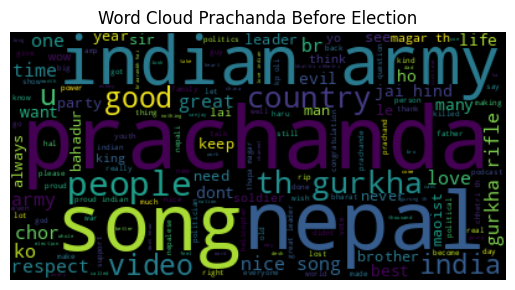

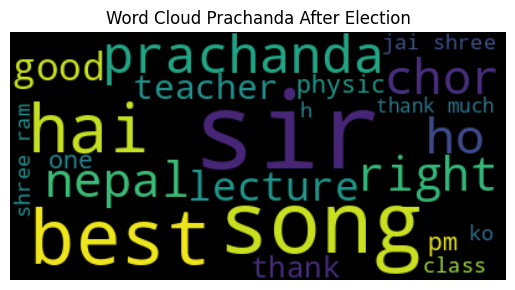

In [ ]:
# prompt: form word cloud for processed_text  before and after election

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed texts before the election
text_before = " ".join(before_election_df['processed_text'].astype(str))

# Combine all processed texts after the election
text_after = " ".join(after_election_df['processed_text'].astype(str))


# Create and generate a word cloud image:
wordcloud_before = WordCloud().generate(text_before)

# Display the generated image:
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Prachanda Before Election")
plt.show()


# Create and generate a word cloud image:
wordcloud_after = WordCloud().generate(text_after)

# Display the generated image:
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Prachanda After Election")
plt.show()

TOP WORDS

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# ... (Your existing code for loading data and preprocessing) ...

# Combine all processed texts before the election
text_before = " ".join(before_election_df['processed_text'].astype(str))

# Combine all processed texts after the election
text_after = " ".join(after_election_df['processed_text'].astype(str))

def get_top_n_words(text, n=10):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

top_words_before = get_top_n_words(text_before, 8)
top_words_after = get_top_n_words(text_after, 8)

print("Top 20 words before election:")
for word, count in top_words_before:
    print(f"{word}: {count}")

print("\nTop 20 words after election:")
for word, count in top_words_after:
    print(f"{word}: {count}")

Top 20 words before election:
song: 103
indian: 95
army: 93
prachanda: 81
nepal: 66
gurkha: 61
people: 58
video: 58

Top 20 words after election:
sir: 136
song: 66
best: 46
hai: 35
se: 35
prachanda: 34
thank: 32
ho: 30


In [ ]:
# prompt: display processed_text where there is "song" word . Display full text

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# ... (Your existing code for loading data and preprocessing) ...

for index, row in df.iterrows():
    if "song" in row['processed_text']:
        print(row['processed_text'])

nice song
super editing justice song bahubali movie also got new meaning seems scene song made eachother hat
honest idont like people india many reason indian army motivates song add extra charm
cat listened songshe lion
nice song
nice motivational song
nice song
grandiloquent style song
wow nice song vinaju
song connects disconnected heartbrlove support prachanda rai whole team
muslim song nicemillion se jada sun chuki hoon isko orshiv tandav kodo song bhut hi energy dete muje
nice song prachanda brother nice voice
beautiful song nice try
great song
yatharta git ho good song
wow song
ordinary songeach word song feel immense energyamp dedicated great mahabharata biggest war human history foughtvictory truth evil
melodious song congratulation entire team
song connect emotion better therapist lovely song
song fit mostbrbrindian army goat greatest time
nice song
song full josh
nice song
nice song
nice song
literally song enough make feel motivated brjai hind
great song jai hind
nice song


distilbert-base-uncased-finetuned-sst-2-english model for sentiment analysis

In [ ]:
# https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english

from transformers import pipeline

# Load the sentiment analysis pipeline
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to apply sentiment analysis to a text
def analyze_sentiment(text):
    try:
        result = classifier(text)[0]
        return result['label'], result['score']
    except Exception as e:
        print(f"Error analyzing sentiment for text: {text}. Error: {e}")
        return "ERROR", 0.0  # Return a default value in case of an error

# Apply sentiment analysis to the 'processed_text' column
before_election_df[['sentiment_label', 'sentiment_score']] = before_election_df['processed_text'].apply(lambda x: pd.Series(analyze_sentiment(x)))
after_election_df[['sentiment_label', 'sentiment_score']] = after_election_df['processed_text'].apply(lambda x: pd.Series(analyze_sentiment(x)))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (797 > 512). Running this sequence through the model will result in indexing errors


Error analyzing sentiment for text: lyriics meaning braarambh hai prachand brthe beginning shattering brbolein mastakon ke jhund brsay horde head collection people br braaj jung ki ghadi ki tum guhaar brtoday time war give shout br braarambh hai prachand brbolein mastakon ke jhund braaj jung ki ghadi ki tum guhaar br braan baan shaan brpride show prestige br bryaa ki jaan ka ho daan bror life sacrificed br braaj ek dhanush ke baan pe utaar repeat chorus brgive arrow bow br braarambh hai prachand br brman kare pran de brif mind wish give life br brjo man kare pran le brif mind wish take life br brwahi ek sarv shaktimaan hai repeat chorus brthat man powerful br brkrishn ki pukaar hai ye brthis call krishan gave br brbhaagwat ka saar hai brthis essence bhagvat gita br brki yuddh hi veer ka pramaan hai brthat war proof valor br brkaurawon ki bheed ho brbe horde kauravs br brya paandavon ka neerd ho bror strength pandavas br brjo lad sakaa hai wohi mahaan hai brhe fight one powerful br brje

emotion-english-distilroberta-base model for emotion detection

In [ ]:
before_election_df

,author,published_at,like_count,processed_text,sentiment_label,sentiment_score
0,@swatantrasubba1888,2022-11-07 14:46:48,4.0,election ko time publicity stunt,NEGATIVE,0.991023
1,@tantrichill192,2022-11-12 18:22:35,0.0,nothing criminal murderer old folk arethey jai...,POSITIVE,0.855190
2,@tulasirajkandel1614,2022-10-31 14:22:56,2.0,nice song,POSITIVE,0.999855
3,@arjunroy4150,2022-05-27 09:29:43,1.0,proud indian feel proud indian army,POSITIVE,0.999851
4,@kamalbhattarai9571,2022-11-09 10:20:29,1.0,good conversation,POSITIVE,0.999859
...,...,...,...,...,...,...
897,@phoenix8628,2022-02-18 17:17:06,0.0,biswa geee thanks good information everything,POSITIVE,0.999782
898,@rajendra.co.uk12345,2022-10-15 02:52:18,0.0,prachanda main reason unstable government nepa...,NEGATIVE,0.980842
899,@tekrajdulal855,2022-11-13 16:23:14,0.0,great leader,POSITIVE,0.999860
900,@lekhnathacharya8462,2022-04-12 13:07:52,0.0,prachanda bos dami best,POSITIVE,0.998494


In [ ]:
#  https://huggingface.co/j-hartmann/emotion-english-distilroberta-base

from transformers import pipeline

# Load the emotion detection model
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Function to detect emotions in a text
def detect_emotion(text):
    try:
        result = classifier(text)
        return result[0]['label']  # Return the predicted emotion label
    except Exception as e:
        print(f"Error processing text: {e}")
        return None

# Apply the emotion detection model to the 'processed_text' column
before_election_df['detected_emotion'] = before_election_df['processed_text'].apply(detect_emotion)
after_election_df['detected_emotion'] = after_election_df['processed_text'].apply(detect_emotion)

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (817 > 512). Running this sequence through the model will result in indexing errors


Error processing text: The expanded size of the tensor (817) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 817].  Tensor sizes: [1, 514]
Error processing text: The expanded size of the tensor (1185) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1185].  Tensor sizes: [1, 514]
Error processing text: The expanded size of the tensor (1108) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 1108].  Tensor sizes: [1, 514]
Error processing text: The expanded size of the tensor (848) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 848].  Tensor sizes: [1, 514]


In [ ]:
before_election_df

,author,published_at,like_count,processed_text,sentiment_label,sentiment_score,detected_emotion
0,@swatantrasubba1888,2022-11-07 14:46:48,4.0,election ko time publicity stunt,NEGATIVE,0.991023,neutral
1,@tantrichill192,2022-11-12 18:22:35,0.0,nothing criminal murderer old folk arethey jai...,POSITIVE,0.855190,anger
2,@tulasirajkandel1614,2022-10-31 14:22:56,2.0,nice song,POSITIVE,0.999855,joy
3,@arjunroy4150,2022-05-27 09:29:43,1.0,proud indian feel proud indian army,POSITIVE,0.999851,joy
4,@kamalbhattarai9571,2022-11-09 10:20:29,1.0,good conversation,POSITIVE,0.999859,neutral
...,...,...,...,...,...,...,...
897,@phoenix8628,2022-02-18 17:17:06,0.0,biswa geee thanks good information everything,POSITIVE,0.999782,joy
898,@rajendra.co.uk12345,2022-10-15 02:52:18,0.0,prachanda main reason unstable government nepa...,NEGATIVE,0.980842,fear
899,@tekrajdulal855,2022-11-13 16:23:14,0.0,great leader,POSITIVE,0.999860,joy
900,@lekhnathacharya8462,2022-04-12 13:07:52,0.0,prachanda bos dami best,POSITIVE,0.998494,neutral


In [ ]:
# prompt: Using dataframe before_election_df: convert this into csv

# Convert the dataframe to a CSV file.
before_election_df.to_csv('before_election_df.csv', index=False) # index=False prevents writing row indices to the file.


Sentiment Counts

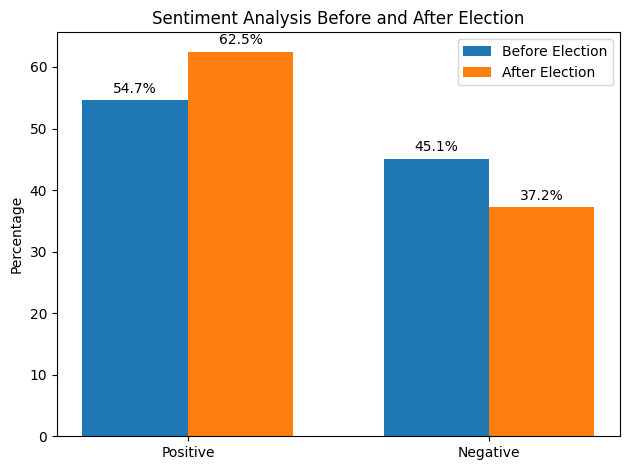

In [ ]:
# prompt: compare sentiment before and after election using different chart in percentage

import matplotlib.pyplot as plt

# Calculate sentiment percentages before and after the election
before_positive = before_election_df[before_election_df['sentiment_label'] == 'POSITIVE'].shape[0]
before_negative = before_election_df[before_election_df['sentiment_label'] == 'NEGATIVE'].shape[0]
before_total = before_election_df.shape[0]

after_positive = after_election_df[after_election_df['sentiment_label'] == 'POSITIVE'].shape[0]
after_negative = after_election_df[after_election_df['sentiment_label'] == 'NEGATIVE'].shape[0]
after_total = after_election_df.shape[0]


before_positive_percent = (before_positive / before_total) * 100 if before_total else 0
before_negative_percent = (before_negative / before_total) * 100 if before_total else 0
after_positive_percent = (after_positive / after_total) * 100 if after_total else 0
after_negative_percent = (after_negative / after_total) * 100 if after_total else 0


# Create the chart
labels = ['Positive', 'Negative']
before_percentages = [before_positive_percent, before_negative_percent]
after_percentages = [after_positive_percent, after_negative_percent]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], before_percentages, width, label='Before Election')
rects2 = ax.bar([i + width/2 for i in x], after_percentages, width, label='After Election')

ax.set_ylabel('Percentage')
ax.set_title('Sentiment Analysis Before and After Election')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add percentage labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

EMOTION COUNT

In [ ]:
# Group the DataFrame by 'detected_emotion' and count the occurrences of each emotion.
emotion_counts = before_election_df.groupby('detected_emotion').size()

# Display the emotion counts.
emotion_counts

,0
detected_emotion,
anger,105
disgust,11
fear,29
joy,230
neutral,393
sadness,58
surprise,74


In [ ]:
emotion_countss=after_election_df.groupby('detected_emotion').size()
emotion_countss

,0
detected_emotion,
anger,24
disgust,6
fear,16
joy,127
neutral,386
sadness,33
surprise,38


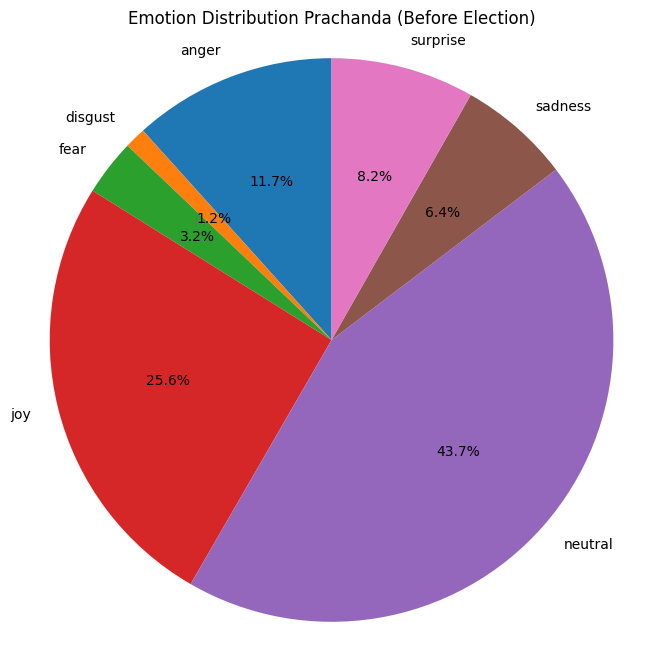

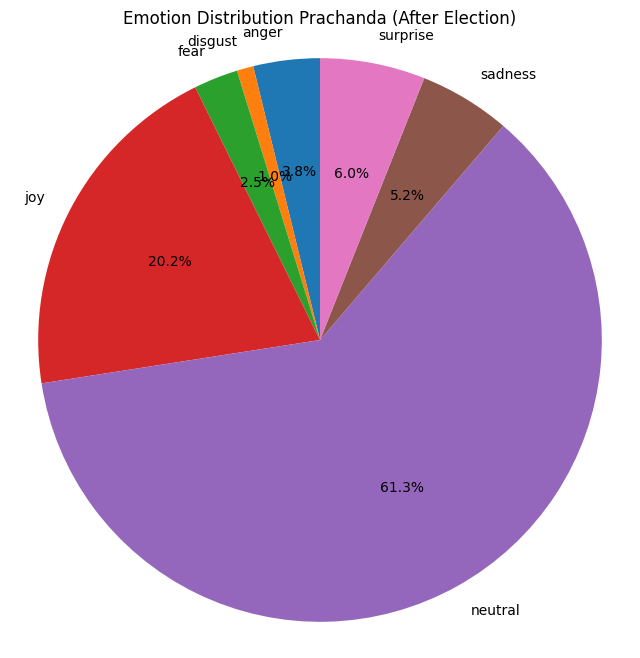

In [ ]:
import matplotlib.pyplot as plt

# Create the pie chart for before election
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution Prachanda (Before Election)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Create the pie chart for after election
plt.figure(figsize=(8, 8))
plt.pie(emotion_countss, labels=emotion_countss.index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution Prachanda (After Election)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

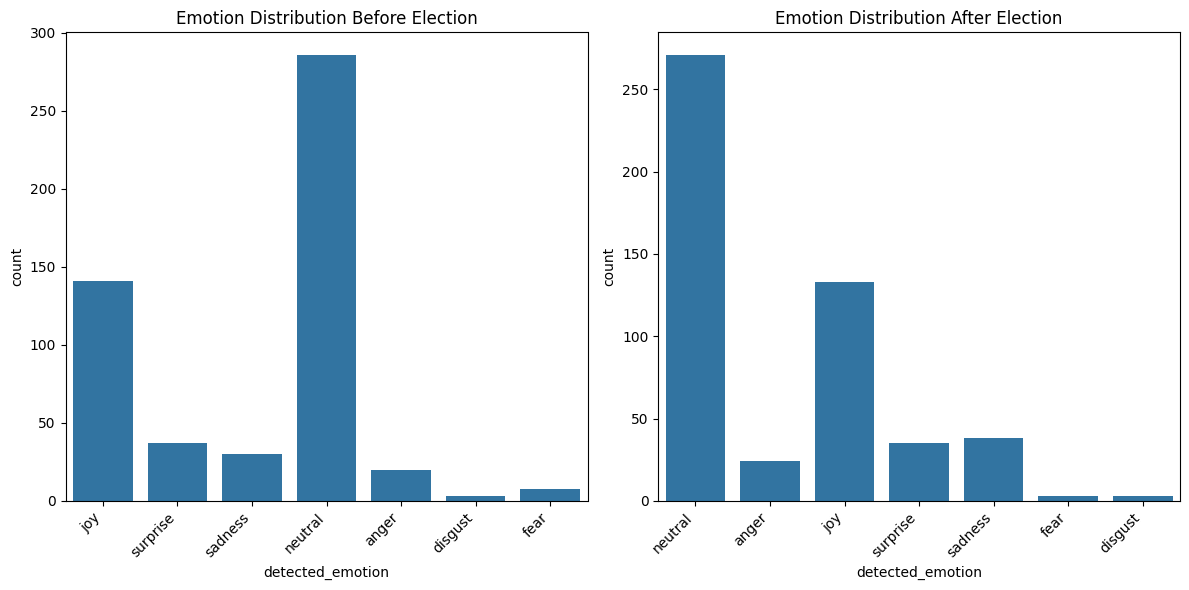

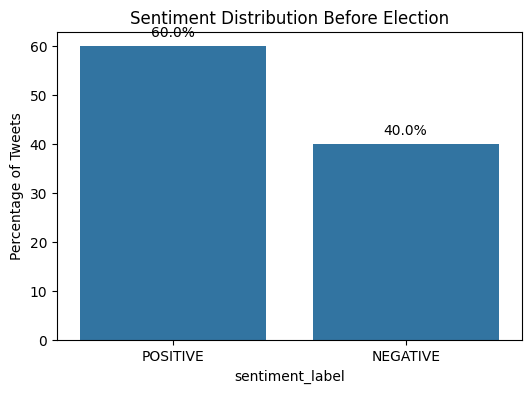

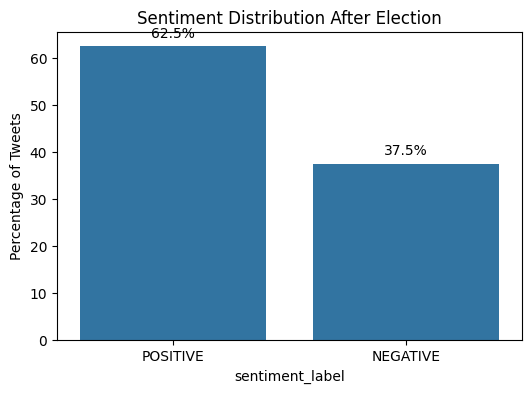

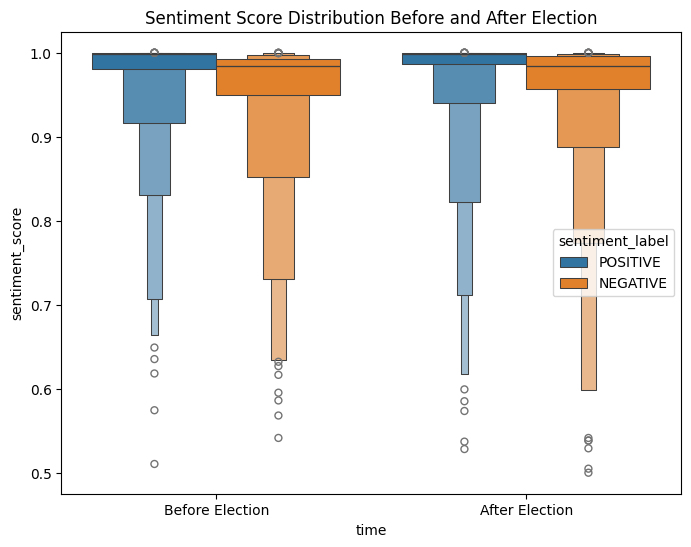

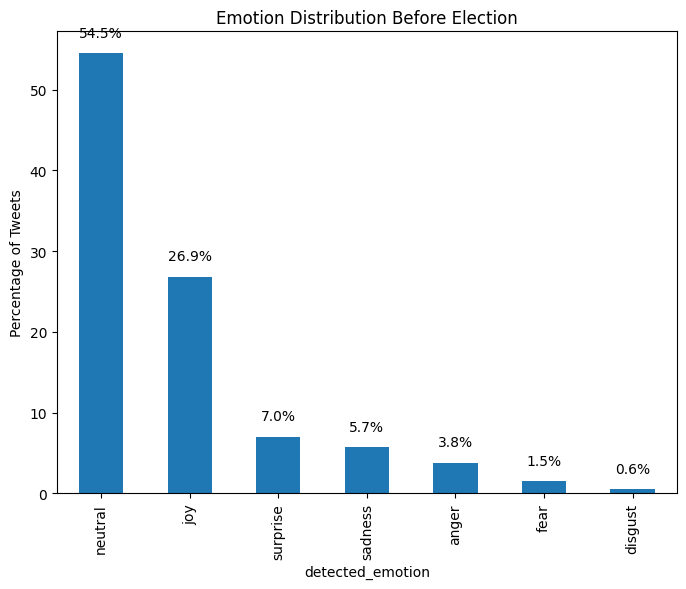

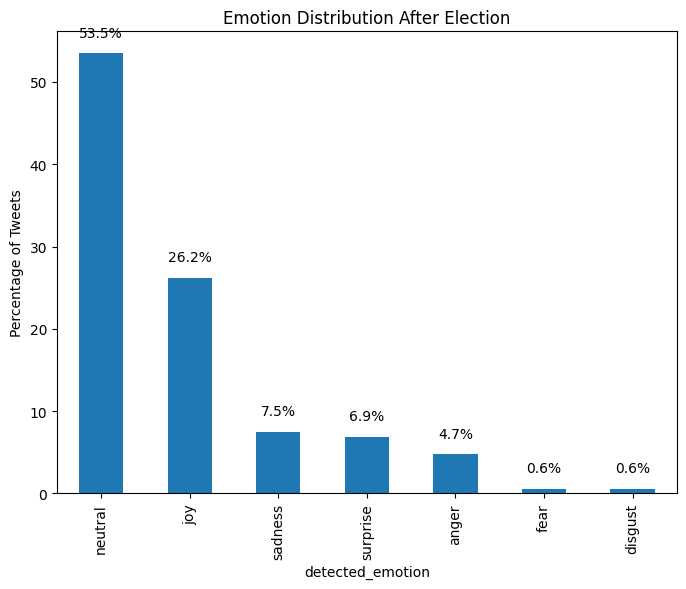

In [ ]:
# prompt: compare emotion before and after election using different charts

# Assuming you have before_election_df and after_election_df DataFrames as in your original code.

import matplotlib.pyplot as plt
import seaborn as sns

# Emotion Distribution - Countplot

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='detected_emotion', data=before_election_df)
plt.title('Emotion Distribution Before Election')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.countplot(x='detected_emotion', data=after_election_df)
plt.title('Emotion Distribution After Election')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Sentiment Distribution - Percentage Barplot
def plot_sentiment_percentages(df, title):
    sentiment_counts = df['sentiment_label'].value_counts(normalize=True) * 100
    plt.figure(figsize=(6, 4))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
    plt.title(title)
    plt.ylabel('Percentage of Tweets')
    for i, v in enumerate(sentiment_counts.values):
        plt.text(i, v + 2, f'{v:.1f}%', ha='center')
    plt.show()

plot_sentiment_percentages(before_election_df, 'Sentiment Distribution Before Election')
plot_sentiment_percentages(after_election_df, 'Sentiment Distribution After Election')


# Combined Sentiment and Emotion - Boxenplot
# Create a combined dataframe
combined_df = pd.concat([before_election_df.assign(time='Before Election'),
                         after_election_df.assign(time='After Election')])

# Boxenplot for Sentiment Score across time periods
plt.figure(figsize=(8, 6))
sns.boxenplot(x='time', y='sentiment_score', hue='sentiment_label', data=combined_df)
plt.title('Sentiment Score Distribution Before and After Election')
plt.show()


# Emotion Distribution across time periods (using percentages for comparison)
def plot_emotion_percentages(df, title):
    emotion_percentages = df['detected_emotion'].value_counts(normalize=True) * 100
    plt.figure(figsize=(8,6))
    emotion_percentages.plot(kind='bar')
    plt.title(title)
    plt.ylabel('Percentage of Tweets')
    for i, v in enumerate(emotion_percentages.values):
        plt.text(i, v + 2, f'{v:.1f}%', ha='center')
    plt.show()

plot_emotion_percentages(before_election_df,'Emotion Distribution Before Election')
plot_emotion_percentages(after_election_df,'Emotion Distribution After Election')
